### 前言

层次聚类的优缺点:
* 优点:
    * 距离和规则的相似度容易定义
    * 不需要预先指定聚类数
* 缺点:
    * 计算复杂度太高
    * 异常值会产生很大影响

### sklearn中的层次聚类

class sklearn.cluster.AgglomerativeClustering(n_clusters=2,...,affinity='euclidean',..,linkage='ward', ...)

三个重要参数:
* n_clusters:用户指定的簇个数
* linkage:连接方法，包括最小距离(ward)，最大距离(complete)和平均距离(average)三种方式。
* affinity:距离计算方式,默认使用欧式距离。

### AGNES算法从零实现

In [1]:
import numpy as np
import pandas as pd

In [2]:
class AGNES():
    '''
    AGNES算法
    '''
    def __init__(self,n_cluster=2,linkage='ward'):
        self.n_cluster=n_cluster
        if linkage=='ward':
            #最小距离
            self.dist_func=self.dist_min
        elif linkage=='complete':
            #最大距离
            self.dist_func=self.dist_max
        elif linkage=='average':
            #平均距离
            self.dist_func=self.dist_avg
        else:
            print("ERROR!")
    
    def dist(self,vecA,vecB):
        '''
        计算两个向量的欧式距离
        Args:
            vecA:输入向量A,shape(1,n)
            vecB:输入向量B,shape(1,n)
        '''
        vecA=np.array(vecA)
        vecB=np.array(vecB)
        return np.sqrt(np.sum((vecA-vecB)**2))
    
    def dist_min(self,Ci,Cj):
        '''
        计算两个簇的最小距离
        Args:
            Ci:簇i,shape(x,n)
            Cj:簇j,shape(y,n)
        '''
        return np.min([self.dist(i,j) for i in Ci for j in Cj])
    
    def dist_max(self,Ci,Cj):
        '''
        计算两个簇的最大距离
        '''
        return np.max([self.dist(i,j) for i in Ci for j in Cj])
    
    def dist_avg(self,Ci,Cj):
        '''
        计算两个簇的平均距离
        '''
        return np.sqrt(np.sum([self.dist(i,j) for i in Ci for j in Cj]))
    
    def find_min(self,M):
        '''
        查找距离最近的两个簇
        Args:
            M:距离矩阵,shape(m,m)
        Returns:
            x:x下标
            y:y下标
            min_dist:最小距离
        '''
        min_dist=np.inf
        for i in range(len(M)):
            for j in range(len(M[i])):
                if i!=j and M[i][j]<min_dist:
                    min_dist=M[i][j]
                    x=i
                    y=j
        return x,y,min_dist
    
    def fit(self,data):
        '''
        AGNES核心函数
        Args:
            data:输入数据,shape(m,n)
        Returns:
            C:聚类后的结果
        '''
        m,n=data.shape
        C=[]
        #step1:每个样本单独初始化为一个簇
        for i in range(m):
            C.append([data[i]])
        M=[]
        #step2:初始化距离矩阵
        for Ci in C:
            Mi=[]
            for Cj in C:
                Mi.append(self.dist_func(Ci,Cj))
            M.append(Mi)
        k=self.n_cluster
        #step3:将簇不断合并
        while m>k:
            #step4:找到距离最近的两个簇
            x,y,min_dist=self.find_min(M)
            C[x].extend(C[y])
            C.pop(y)
            #step5:重新计算距离矩阵
            M=[]
            for Ci in C:
                Mi=[]
                for Cj in C:
                    Mi.append(self.dist_func(Ci,Cj))
                M.append(Mi)
            m=m-1
        return C

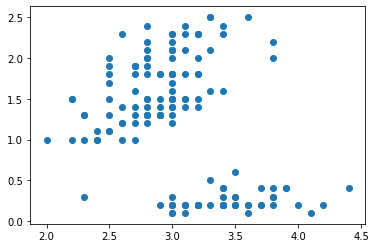

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris=datasets.load_iris()
X,y=iris.data,iris.target
#为了方便可视化，这里取两个维度
data=X[:,[1,3]]
plt.scatter(data[:,0],data[:,1])

In [4]:
#层次聚类
model=AGNES(2)
C=model.fit(data)

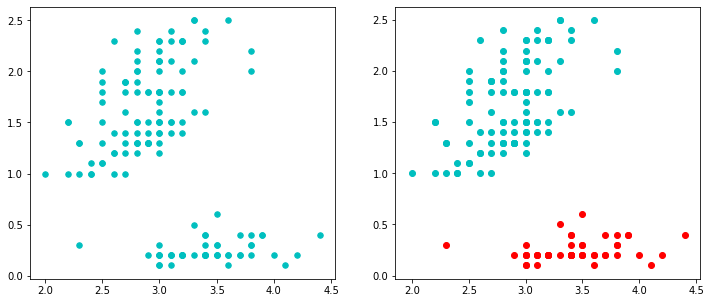

In [5]:
data0=np.array(C[0])
data1=np.array(C[1])
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.scatter(data[:,0],data[:,1],c='c',s=30,marker='o')
ax2.scatter(data0[:,0],data0[:,1],c='r')
ax2.scatter(data1[:,0],data1[:,1],c='c')
plt.show()

从结果可以看出，层次聚类对当前数据集聚类的效果较好，但是计算量太大，耗时较长。